<a href="https://colab.research.google.com/github/datactivist/scpo-data-science-bootcamp/blob/main/notebooks/3_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualization

In this notebook, we will see how to build some data visualizations for our OpenFoodFacts dataset.

## Accessing the data

You need two files (csv and txt) that are on the Google Drive of my Sciences Po account :

* [data file (csv)](https://drive.google.com/file/d/14Pyz3Wb-FGs_9H-e7K-4Ug2X31N81Amv/view?usp=sharing),
* [metadata file (txt)](https://drive.google.com/file/d/1EUBD1btT8k4PS073WLUqGm_UucUl4n3P/view?usp=sharing) (column types, so that pandas does not have to guess them).

For **each of these 2 files**:
1. Open the link
2. Click on the "Add shortcut to Drive" button
<center>
<img src="https://github.com/datactivist/scpo-data-science-bootcamp/raw/main/notebooks/img/drive-1.png" width=400>
</center>
3. In the menu, click on "My Drive"
<center>
<img src="https://github.com/datactivist/scpo-data-science-bootcamp/raw/main/notebooks/img/drive-2.png" width=400>
</center>
4. Click on "Add shortcut here"
<center>
<img src="https://github.com/datactivist/scpo-data-science-bootcamp/raw/main/notebooks/img/drive-3.png" width=400>
</center>

This will add shortcuts, in your Sciences Po (Google) drive, to the files stored on Mathieu's Sciences Po (Google) Drive.

Then you need to authorize Colab to access files (here shortcuts) on your Drive.

Execute this next cell, a pop-up will appear asking you to select your Sciences Po (Google) account, then asking you to authorize access.

In [ ]:
# enable Colab to access files (here shortcuts) on your Drive
from google.colab import drive
drive.mount('/content/drive')

The files can now be accessed from the shortcuts on your drive.

## Loading the data

In [ ]:
# (just execute this cell)

# import pandas
import pandas as pd
# we need this data type for ordered categoricals
from pandas.api.types import CategoricalDtype
# lift some limitations in column width, so more cell values are displayed in full
pd.set_option('display.max_colwidth', 110)

# dataset and data type of the columns
OFF_FILE = 'drive/MyDrive/off_products_subset.csv'
DTYPE_FILE = 'drive/MyDrive/dtype.txt'

# custom function to load the Open Food Facts subset
def load_off():
  """Load the filtered subset of OpenFoodFacts.
  
  Returns
  -------
  df : pd.DataFrame
    (A filtered subset of the) OpenFoodFacts tabular dataset.
  """
  # load the data types for the columns
  with open(DTYPE_FILE) as f:
    dtype = eval(f.read())

  # load the dataset
  df = pd.read_csv(OFF_FILE, sep='\t', dtype=dtype)
  # convert columns with datetimes
  for col_name in ('created_datetime', 'last_modified_datetime'):
    # ISO 8601 dates
    df[col_name] = pd.to_datetime(df[col_name])
  #
  return df

# load the dataset
df = load_off()

## Simple visualizations on OpenFoodFacts

### Seaborn

[Seaborn](https://seaborn.pydata.org/) is a data visualization library for Python.
It provides a simpler, higher-level interface to the powerful but cumbersome library [matplotlib](https://matplotlib.org/), and enables to quickly build readable dataviz.

We need to import the seaborn library, whose conventional alias is `sns`.

In [ ]:
import seaborn as sns

## Nutri-Score

Nutri-Score grades are an ordered categorical variable, with 5 values ranging from A (healthy) to E (unhealthy).

These grades are based on an integer score, ranging from -15 (A) to +40 (E).
This score is computed as a sum of positive and negative points attributed based on nutritional values and ingredients, with separate scales for big categories of products.

In this section, we will build graphs to visualize Nutri-Score grades and scores.

To facilitate their reading, we will use the color palette of the Nutri-Score grades.

In [ ]:
# color palette of the Nutri-Score grades
colors_nutriscore = {
    'a': "#058244",
    'b': "#85BD39",
    'c': "#FDCD2A",
    'd': "#ED831E",
    'e': "#E53F1A",
}

### Visualizing categorical data : Nutri-Score grade

Seaborn enables to visualize categorical variables in a [variety of manners](https://seaborn.pydata.org/tutorial/categorical.html#plotting-with-categorical-data).

These visualizations can be built by calling the high-level function `catplot` and specifying, among other arguments, the type of categorical plot we want.

Let us try to answer the following vague question : "How healthy are the products sold in supermarkets ?".

This can translate to this more precise question : "How many products of each Nutri-Score grade does the dataset contain?".

We can answer the latter question by building a plot that represents, for each Nutri-Score grade, the total number of products in the dataset.
This corresponds in seaborn, and in the documentation page linked above, to a **count plot**.

Because a count plot is a special kind of categorical plot, we will call the high-level function [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) with the arguments describing that we want to build,
* a count plot : `kind='count'`,
* on our dataset : `data=df`,
* with one count bar for each Nutri-Score grade : `x=nutriscore_grade`,
* where each bar is colored following the Nutri-Score color palette : `palette=colors_nutriscore`.

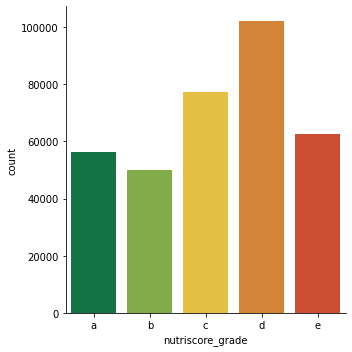

In [ ]:
sns.catplot(data=df, x='nutriscore_grade',
            kind='count', palette=colors_nutriscore)

This is the overall distribution of Nutri-Score grades on products across brands, but maybe some brands produce healthier products than others.

To quickly explore this hypothesis, let us look at the 9 most frequent brands in the dataset :

* count brands using the [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method, with the result sorted in descending order,
* slice this result to keep the first 9.

In [ ]:
# select the 9 most frequent brands
top_brands =  # ...
top_brands

Carrefour       9243
Auchan          7673
U               5222
Hacendado       3267
Casino          3153
Leader Price    3098
Delhaize        2334
Cora            2321
Picard          2003
Name: brands, dtype: Int64

To retrieve the names of these 9 brands, rather than their counts, we need to use the [keys](https://pandas.pydata.org/docs/reference/api/pandas.Series.keys.html) method.

In [ ]:
top_brands_names =  # ...
top_brands_names

Index(['Carrefour', 'Auchan', 'U', 'Hacendado', 'Casino', 'Leader Price',
       'Delhaize', 'Cora', 'Picard'],
      dtype='object')

Filter the products from these top 9 brands using [isin](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html) and store this subset in a new variable `df_top_brands`.

In [ ]:
df_top_brands =  # ...
df_top_brands

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,...,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,vitamin-b1_100g,potassium_100g,calcium_100g,iron_100g,magnesium_100g,nutrition-score-fr_100g
1905,0020176240512,http://world-en.openfoodfacts.org/product/0020...,kiliweb,2018-01-03 12:01:36+00:00,2021-02-15 12:53:25+00:00,4 Vol Au Vent,<NA>,4 Stück,<NA>,Auchan,...,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
7737,0051228638094,http://world-en.openfoodfacts.org/product/0051...,kiliweb,2018-08-29 18:00:09+00:00,2021-07-08 20:34:11+00:00,Crackers,<NA>,<NA>,<NA>,Leader Price,...,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
10228,0066844370082,http://world-en.openfoodfacts.org/product/0066...,kiliweb,2017-11-12 12:01:36+00:00,2021-01-22 21:43:39+00:00,Pois cassés verts,<NA>,500g,<NA>,Leader Price,...,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
10229,0066844370099,http://world-en.openfoodfacts.org/product/0066...,kiliweb,2020-03-16 23:21:54+00:00,2021-02-12 00:17:58+00:00,Haricots Coco,<NA>,500 g,"Sachet,Plastique",Leader Price,...,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0
10231,0066844370617,http://world-en.openfoodfacts.org/product/0066...,kiliweb,2018-03-22 13:15:18+00:00,2021-08-09 08:56:26+00:00,Lentille Vertes Qualité Supérieure,<NA>,<NA>,<NA>,Leader Price,...,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416479,9788430549085,http://world-en.openfoodfacts.org/product/9788...,kiliweb,2019-08-27 09:43:27+00:00,2021-08-08 23:43:37+00:00,Tortitas Arroz chocolate blanco sabor yogur,<NA>,<NA>,<NA>,Hacendado,...,0.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
416480,9788472397927,http://world-en.openfoodfacts.org/product/9788...,kiliweb,2019-07-26 20:20:25+00:00,2021-07-26 17:21:20+00:00,Gazpacho,<NA>,<NA>,Pure-Pak,Hacendado,...,0.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0
416483,9788483783931,http://world-en.openfoodfacts.org/product/9788...,kiliweb,2020-06-08 09:52:22+00:00,2020-11-11 21:38:57+00:00,Tortitas arroz chocolate blanco sabor yogur,<NA>,<NA>,<NA>,Hacendado,...,0.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
416529,99306579,http://world-en.openfoodfacts.org/product/9930...,kiliweb,2019-08-09 16:09:13+00:00,2020-11-14 15:40:03+00:00,Filet de poulet,<NA>,<NA>,<NA>,Delhaize,...,0.680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


You should get 38314 entries.

Now, we want to plot the distribution of Nutri-Score grades separately for each of these top brands.

This will be very similar to the previous graph, except we will make use of catplot's ability to display [multiple facets](https://seaborn.pydata.org/tutorial/categorical.html#showing-multiple-relationships-with-facets).

Changes are :

* we only want to plot products from the top brands (`data=df_top_brands`),
* we want to build a distinct plot for each brand (`col=brands`),
* and display 3 plots in a row, so it fits our screen (`col_wrap=3`).

In [ ]:
# write your catplot


The distribution among Nutri-Score categories seems quite similar across brands, but does this hold true on the underlying Nutri-Score *scores* ?

### Visualizing numerical data : Nutri-Score score

Nutri-Score scores range from -15 to 40, with [grades defined by thresholds (p. 32)]((https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique-en).

For solid foods:

* A: -15 to -1
* B: 0 to 2
* C: 3 to 10
* D: 11 to 18
* E: 19 to 40

For beverages:
* A: waters
* B: -15 to 1
* C: 2 to 5
* D: 6 to 9
* E: 10 to 40

Visualizing the Nutri-Score scores, rather than the Nutri-Score grades, should provide a more accurate, finer-grained view of the healthiness of products according to the Nutri-Score methodology.

Because Nutri-Score scores correspond to a [quantitative variable](https://en.wikipedia.org/wiki/Quantification_(science)), we can plot the distribution of their values using [displot](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-histograms).

By default, `displot` builds a histogram (`kind='hist'`).
Because we know we only have integer values, we can additionally specify we want the bins of the histogram to correspond to [discrete values](https://en.wikipedia.org/wiki/Continuous_or_discrete_variable#Discrete_variable) (`discrete=True`). Otherwise, the bin sizes estimated by seaborn result in gaps that hinder readibility. 

First, let us build the distribution graph for the entire dataset.

In [ ]:
# write your displot

This graph looks almost good, but too tight because it tries to fit many bars in a limited width.
We can modify the size of the figure of the displot by using parameters `height` (in inches) and `aspect`, where the figure width will be `height * aspect` (inches).
The default values are [`height=5` and `aspect=1`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), so we will increase the `aspect`.

In [ ]:
# displot with aspect increased to eg. 1.5 

The readability of the graphd is increased, as expected.

Then let us produce the same type of distribution graph, but for each of the top brands we selected earlier.
Remember to change the data and add the extra arguments that tell seaborn what distinct plots it should build and what their layout should be.

In [ ]:
# displot for top brands

### Visualizing numerical and categorical data : Nutri-Score score and grade

This is all nice but the Nutri-Score score graphs could be more readable if the bars had the nice colors from the Nutri-Score grade graphs.
As each Nutri-Score score maps to a Nutri-Score grade, this should be straightforward.
`displot` has an argument `hue` that can take a column name (here `'nutriscore_grade'`), and the same `palette` argument as `catplot`.

Let us build the distribution plot of Nutri-Score scores, with the colors of the Nutri-Score grades, for the whole dataset.

In [ ]:
# displot with hue and palette

You should notice something weird at the bottom of many bars: It seems as if another, more opaque, bar is superposed.

This might indicate that some products with the same Nutri-Score score have different grades.

We can modify our distribution plot of Nutri-Score scores with colors for grades, so that bars for different Nutri-Score grades are properly stacked rather than (confusingly) laid over one another.

This is done with the parameter `multiple='stack'` (the default value for a [histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) is `multiple='layer'`).

In [ ]:
# displot with hue, palette and multiple='stack'

**Exercise** Build the distribution plot of Nutri-Score scores, with the colors of the Nutri-Score grades, for all products (foods and beverages together) from the top brands (defined above).

In [ ]:
# displot for top brands with hue, palette, stack

### Using data visualization to assess data quality and revise assumptions

Now that bars are properly stacked, it is clear that some products with the same Nutri-Score score have different Nutri-Score grades.
This discrepancy has an obvious explanation: The thresholds between Nutri-Score grades are different for solid foods and beverages.

We can test our hypothesis by selecting the products that are beverages: We define beverages as the entries whose field `categories_en` contains the string "Beverages".

In [ ]:
df_bev =  # ...
df_bev  # should be 52,286 rows

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,...,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,vitamin-b1_100g,potassium_100g,calcium_100g,iron_100g,magnesium_100g,nutrition-score-fr_100g
40,0002000003555,http://world-en.openfoodfacts.org/product/0002...,kiliweb,2018-02-18 15:38:19+00:00,2019-08-23 20:35:58+00:00,Ruby breakfast,<NA>,1 L,<NA>,Tropicana,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
65,0008274000078,http://world-en.openfoodfacts.org/product/0008...,openfoodfacts-contributors,2016-06-13 02:11:52+00:00,2020-04-23 19:27:19+00:00,"Extra craft ginger beer, extra",Ginger Beer,12 fl oz,"Glass,Bottle",Reed's,...,0.000000,NaN,NaN,NaN,NaN,0.008,0.000,0.00011,NaN,13.0
66,0008274004687,http://world-en.openfoodfacts.org/product/0008...,openfoodfacts-contributors,2019-09-11 01:19:18+00:00,2020-04-23 19:27:19+00:00,"Strongest craft ginger beer, strongest",<NA>,12fl oz,<NA>,Reed’s,...,0.000005,0.0,NaN,NaN,NaN,0.008,0.000,0.00011,NaN,13.0
67,0008274006667,http://world-en.openfoodfacts.org/product/0008...,kiliweb,2021-04-04 18:05:58+00:00,2021-05-16 14:01:08+00:00,Reed’s Real Ginger Ale Zero,<NA>,12 fl oz,can,Reed's,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77,0008346500123,http://world-en.openfoodfacts.org/product/0008...,openfoodfacts-contributors,2020-03-06 20:18:51+00:00,2021-05-22 19:12:00+00:00,Meal Replacement Shake,<NA>,<NA>,<NA>,Slimfast,...,0.046154,NaN,0.000184,0.0203,0.0,0.215,0.123,0.00083,0.043,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416523,9906410000009,http://world-en.openfoodfacts.org/product/9906...,agamitsudo,2013-07-10 18:20:08+00:00,2016-01-03 20:00:15+00:00,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,Bouteille en verre,Roussette du Bugey,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416526,99111250,http://world-en.openfoodfacts.org/product/9911...,balooval,2013-04-28 15:30:39+00:00,2021-02-22 22:46:47+00:00,Thé vert Earl grey,thé bio équitable,50 g,"boîte,carton",Lobodis,...,0.010160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416532,99351142,http://world-en.openfoodfacts.org/product/9935...,kiliweb,2019-12-07 16:59:27+00:00,2020-01-15 15:37:02+00:00,Boisson litchi goyave,<NA>,<NA>,<NA>,Agidra,...,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
416540,99877026,http://world-en.openfoodfacts.org/product/9987...,kiliweb,2019-10-20 11:37:00+00:00,2019-10-20 12:01:01+00:00,Nectar de mangue,<NA>,1 l,"Bouteille,Verre",Gilbert,...,0.012000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0


We can plot the Nutri-Score scores and grades for the subset of beverages `df_bev`, exactly as we did above for the whole `df`.

In [ ]:
# displot on df_bev, hue, palette, stack

This is harder to interpret than we expected.

Products with scores of 10 are graded 'a': Are they classified as waters? Is this classification correct, or is the data erroneous?

Grade 'b' should not go higher than 1, yet a non-negligible number of products scored 2 are graded 'b'. Could they be solid foods? Have we inadvertently selected non-beverages due to an ill-defined filter?

We would need to examine the outliers to know if any or all of these leads are correct.


In [ ]:
# in df_bev, select products with Nutri-Score score 2 and grade 'b'

[Foco, coconut milk drink](https://world.openfoodfacts.org/product/0016229919672/foco-coconut-milk-drink) is one of the beverages with Nutri-Score score 2 and grade 'b' that we selected above.

The product page on the Open Food Facts website displays the nutrition facts:
<center>
<img src="https://github.com/datactivist/scpo-data-science-bootcamp/raw/main/notebooks/img/off-nutrition-facts.png" width=400>
</center>

Two elements should be noted:

1. A warning is immediately displayed:
> ⚠️ Warning: the amount of fruits, vegetables and nuts is not specified on the label, it was estimated from the list of ingredients: 0

2. When you click on "Details of the calculation of the Nutri-Score", the content is introduced by this sentence: "This product is not considered a beverage for the calculation of the Nutri-Score."

What do these messages really mean?

#### Missing data

Regarding (1), remember that, while the Nutri-Score grade is displayed on the product, the Nutri-Score score is not.
Therefore, OpenFoodFacts re-estimates the Nutri-Score score from the nutritional values and relevant (estimated) proportion of certain ingredients.
Certain information is hard to retrieve though, like the proportion of fruits, vegetables and nuts in a product, or not always displayed like its fiber content.

As a consequence, the Nutri-Score score in OpenFoodFacts is a best estimate, based on the available information, from the true Nutri-Score score.
The information gap between the available information and all the true values required to compute the Nutri-Score score, could explain some of the discrepancy between the true Nutri-Score grade and its expected value based on the (partial) Nutri-Score score.

We cannot do anything about (1), but this is an important reminder that data can be erroneous, inconsistent, or incomplete. 

It is extremely important to account for issues in data quality while conducting any data-driven analysis or study.

#### Modelling assumptions

As for (2), let us go back to the [scientific and technical QA](https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique-en) from which we got the thresholds for the Nutri-Score grades.

A search on "milk" reveals that:
- "[...] milk, drinkable yoghurt, flavoured or chocolate milk beverages containing more than 80% milk, soups and gazpacho, and plant-based drinks are not considered beverages for the purposes of calculating the Nutri-Score" (p. 8),
- coconut products should be treated in specific ways (p. 21-22).

<center>
<img src="https://github.com/datactivist/scpo-data-science-bootcamp/raw/main/notebooks/img/off-clarif-coconut.png" width=400>
</center>


We can account for (2): We would need to refine our filter so that we select all "Beverages", but exclude all the categories that correspond to the various exceptions listed in the technical document.
This in turn requires to identify the set of categories that capture exactly the set of exceptions.

Refining filters is an iterative process, of trial and error, where you identify one or more outliers, adjust the filter so that items that do not belong are excluded and items that should belong are included.
We will not go any further on this point, because this iterative process is time-consuming, but we hope you understood the gist.

You can look into this issue after you are done with this notebook, and the project.
If you find anything, please let us know !

## Nutri-Score vs Nova

The Nutri-Score and Nova groups capture different aspects of the impact of food products on health.
Are they correlated ?

In [ ]:
# we will use the color palette for the NOVA groups
# couleurs NOVA
colors_nova = {
    '1': '#00aa00',
    '2': '#ffcc00',
    '3': '#ff6600',
    '4': '#ff0000',
}

### Visualizing two categorical variables

We will first plot, for each Nutri-Score grade, the count of products with this Nutri-Score grade and each of the NOVA groups.

(Note that we work on the entire dataset `df` again, after our detour through beverages.)

In [ ]:
# catplot on df, with hue and palette

The NOVA group 4 is dominant in all Nutri-Score grades except the healthiest one (group 'a').
This is consistent with the fact that, by construction, the Nutri-Score and NOVA groups capture different aspects.

Now do the plot the other way round : for each NOVA group, plot the number of products with this NOVA group and each of the Nutri-Score grades. Do not forget to use the right color palette.

In [ ]:
# catplot the other way round

A majority of the products in the NOVA group 1 have the Nutri-Score grade 'a'.
Most raw products (NOVA group 'a') are also nutritionally healthy.

NOVA group 2 contains very few products, mostly from Nutri-Score grades 'c' and below.

The [mode](https://en.wikipedia.org/wiki/Mode_(statistics) of NOVA groups 3 and 4 respectively are Nutri-Score grades 'd' and 'e', but both NOVA groups contain a non-negligible number of products with Nutri-Score 'a'.


### Visualizing numerical and categorical data (again)

Let us see if the same is true for Nutri-Score scores versus NOVA groups.

> **Hint** : use the same `displot` function as earlier but replace arguments specific to Nutri-Score grades with their equivalent for NOVA groups.

In [ ]:
# displot on df, another one

The NOVA group 4 is dominant for all Nutri-Score scores greater than or equal to -3.
Below this threshold, ie. from -15 to -4 included, the mode is NOVA group 1.

This is lower than the threshold between Nutri-Score grades 'a' and 'b': Nutri-Score grade 'a' corresponds to scores between -15 and -2 (included), 'b' to scores between -1 and +3.

All these graphs confirm that Nutri-Score and NOVA are only loosely correlated, because they capture different information.

The latest graph alone indicates that Nutri-Score scores enable finer-grained analyses than Nutri-Score grades.

**Exercise.** Build a displot that shows:
* for each NOVA group,
* the histogram distribution of Nutri-Score scores,
* with colored stacked bars for the Nutri-Score grades.

> **HINT**: You need to specify the right `palette`.

In [ ]:
# faceted displot

The NOVA group 4 contains the highest number of products, across the entire distribution of Nutri-Score scores.

The NOVA group 2 contains very few products, mostly with quite high Nutri-Score scores. Does this NOVA group consist of a few categories of products with high homogeneous Nutri-Score scores ? You can explore this NOVA group 2 in more detail to find out !

**Bonus exercise.** Try and come up with a graph built the other way round, ie. a catplot of NOVA groups that displays distributions of Nutri-Score scores.

> **HINT** The categorical variable (here the NOVA group) can be specified as `x` or `y`. Try both options and keep the one that you find more readable.

> **HINT** You could try different kinds of catplot but we have (a) many observations and (b) missing values, so you should use the distribution plots (`box` or `boxen`).

> **HINT** Specifying a `palette` will improve the looks of your graph. Use the `palette` that best suits your graph.

In [ ]:
# catplot

The general tendency is that the distribution of Nutri-Score scores shifts to the right as the NOVA group increases.

The NOVA group '2' is an exception: The distribution of its Nutri-Score scores is "higher" than we would have expected.

Build a more detailed variant of this graph: Add the Nutri-Score grade as a `hue` variable.

> **HINT** You will need to change the `palette` so that it can apply to the `hue` variable.

In [ ]:
# catplot with 2 variables x and y, plus hue

## Eco-Score

In January 2021, OpenFoodFacts and a number of actors launched the [Eco-Score (French)](https://docs.score-environnemental.com/):
  * [announcement (French)](https://fr.blog.openfoodfacts.org/news/lancement-de-l-eco-score-la-note-environnementale-des-produits-alimentaires)
  * [description (French)](https://fr.openfoodfacts.org/eco-score-l-impact-environnemental-des-produits-alimentaires)

Build for the Eco-Score (score and grade) the same graphs as the ones we produced for the Nutri-Score.

> **HINT**: The corresponding columns are named `ecoscore_score_fr` and `ecoscore_grade_fr`.

In [ ]:
# displot, 1 variable plus hue

In [ ]:
# etc...

We can also compare Nutri-Score scores and Eco-Score scores, with a [scatter plot](https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots).

Scatter plots enable to visualize the joint distribution of two variables, using a cloud of points where each variable is a coordinate in the 2 dimensional plane.

In [ ]:
# relplot, kind scatter

It seems as if the Nutri-Score score and Eco-Score score are quite independent.

We have little hope but let us add the Nutri-Score grade as hue, with its color palette, and see if this helps us see any regularity.

In [ ]:
# relplot, kind scatter, with a hue

Very colorful indeed, but no luck here.

However, scatter plots and [line plots](https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots) are very useful tools that you can put to better use to look at eg. pairs of nutritional values, or a nutritional value and Nutri-Score.

## Congratulations !

You reached the end of your basic training.

You can proceed to the next notebook for the "Project" in which you will design and conduct your own analysis !

### For the adventurous

OpenFoodFacts has a sister project : [OpenBeautyFacts](https://fr-en.openbeautyfacts.org/), a database on cosmetic products, broadly speaking : from hand dishwashing products to creams, shampoos, deodorants, toothpaste...

OpenBeautyFacts is smaller in size and less mature, but you can try and play with their [data exports](https://fr-en.openbeautyfacts.org/data).

But you can also just contribute to OpenFoodFacts or OpenBeautyFacts, via their website, dedicated apps, or third-party apps !